# Initial Data Analisys (IDA) - Scoring PJ

## Estructura de la Meta Data:


La estructura de los datos usados para el estudio se resume en el archivo "InventarioDatos-ScoringPJ - Final". La estructura cambió respecto a la versión inicial en que en la versión inicial se planeaba simular la historia crediticia del grupo objetivo y generar un modelo a partir de la información histórica. Sin embargo, debido al limitado acceso que se tiene a la información de Banco de Bogotá, se decidió reemplazar la metodología de análisis histórico por otra que, en resumen, refleje los criterios de decisión, a partir del análisis de cifras e indicadores, del personal que usualmente aprueba este tipo de clientes en el 1 a 1.

Se partirá del listado de clientes que cuentan con información en las bases de la Superintendencia de Sociedades y, siguiendo con el perfil que se tramita a través del flujo de aprobación de productos comerciales, se seleccionará como grupo objetivo el de aquellas empresas que hayan tenido ventas anuales inferiores a los 2.000 MM de pesos en los últimos dos años fiscales (las cifras se encuentran en miles de pesos). El detalle de las fuentes de información se encuentra en el Inventario de Datos. 




## Procesamiento y limpieza de Datos:

Debido a que las normar NIIF presentan mayor uniformidad de criterio y permite tener un mejor punto de comparación, se decidió tomar únicamente los estados financieros reportados bajo normas NIIF.

Como filtro inicial de los estados financieros, se planea tomar únicamente a las empresas con ventas inferiores a los 2.000 MM de pesos. La mayoría de ellas se encuentran en el grupo de las "Pymes", por lo que esta será la información que se va a tomar.

En cuanto a completitud de información, se sabe que las bases contienen la información financiera tanto para el último año fiscal como para el año anterior (2018 y 2019).


## Descriptivas Generales:

### Lectura de las Bases de Datos

In [53]:
import pandas as pd
Caratula = pd.read_excel ('D:/Maestría en Actuaría y Finanzas/Introduccion a la Ciencia de Datos/Proyecto Final/EF Supersociedades/2019/Pymes-Separados.xlsx',0)
ESF = pd.read_excel ('D:/Maestría en Actuaría y Finanzas/Introduccion a la Ciencia de Datos/Proyecto Final/EF Supersociedades/2019/Pymes-Separados.xlsx',1)
ERI = pd.read_excel ('D:/Maestría en Actuaría y Finanzas/Introduccion a la Ciencia de Datos/Proyecto Final/EF Supersociedades/2019/Pymes-Separados.xlsx',2)
ORI = pd.read_excel ('D:/Maestría en Actuaría y Finanzas/Introduccion a la Ciencia de Datos/Proyecto Final/EF Supersociedades/2019/Pymes-Separados.xlsx',3)
EFE = pd.read_excel ('D:/Maestría en Actuaría y Finanzas/Introduccion a la Ciencia de Datos/Proyecto Final/EF Supersociedades/2019/Pymes-Separados.xlsx',3)

,Codigo Instancia,Nit,Fecha Corte,Punto Entrada,Se reunió el Máximo Órgano Social para considerar los estados financieros,Valor de las utilidades decretadas en miles de pesos (ejercicio inmediatamente anterior),Razón social de la sociedad,Objeto social principal,Clasificación Industrial Internacional Uniforme Versión 4 A.C,Corte de cuentas según estatutos,Fecha de constitución (Aaaa-Mm-Dd),Fecha de vencimiento (Aaaa-Mm-Dd),Estado actual,Tipo societario,La sociedad es,Dirección de notificación judicial registrada en Cámara de Comercio,Departamento de la dirección de notificación judicial,Ciudad de la dirección de notificación judicial,Dirección del domicilio,Departamento de la dirección del domicilio,Ciudad de la dirección del domicilio,Teléfono del domicilio,Celular corporativo,E-mail de la sociedad,Matricula mercantil número,Domicilio casa matriz sucursal de sociedad extranjera,País del domicilio casa matriz sucursal de sociedad extranjera,La compañía está obligada a tener Revisor fiscal?,El Revisor fiscal pertenece a una firma?,A que firma pertenece el Revisor Fiscal?,Los estados finacieros estan acompañados del dictamen del revisor fiscal?,Concepto del Revisor fiscal en su informe,Estos estados financieros presentan información reexpresada?,La información reexpresada corresponde a:,Reexpresión según normatividad que aplique,"La Entidad posee inversiones en subsidiarias, asociadas y/o negocios conjuntos?"
0,148221,900400135,2019-12-31,50 NIIF Pymes - Separados,Si,nan,AUSTRAL LENS COLOMBIA SAS,COMERCIO E IMPORTACIÒN DE LENTES OPTICOS Y MAQ...,G4774 - Comercio al por menor de otros product...,01. ANUAL,2010-12-09 00:00:00,NaN,ACTIVA,08. SOCIEDAD POR ACCIONES SIMPLIFICADA SAS,07. ACTIVIDAD ECONÓMICA DIFERENTE A LAS ANTERI...,CARRERA 57 17 73,BOGOTA D.C.,BOGOTA-D.C.-BOGOTA D.C.,CARRERA 57 17 73,BOGOTA D.C.,BOGOTA-D.C.-BOGOTA D.C.,4660674,3182899735,gte.financiero@australlens.com,2049297,NaN,NaN,Si,Si,GERENCIA CONTABLE CONTADORES ASESORES SAS,Si,03. LIMPIO,No,NaN,NaN,Si
1,148225,900449939,2019-12-31,50 NIIF Pymes - Separados,Si,nan,JMS CONSTRUCTORES SAS,CONSTRUCCION DE OBRAS DE INGENIERIA CIVIL E IN...,F4390 - Otras actividades especializadas para ...,01. ANUAL,2011-06-22 00:00:00,NaN,ACTIVA,08. SOCIEDAD POR ACCIONES SIMPLIFICADA SAS,07. ACTIVIDAD ECONÓMICA DIFERENTE A LAS ANTERI...,CALLE 15 # 40-01 OFICINA 902 CC PRIMAVERA URBANA,META,VILLAVICENCIO-META,CALLE 15 # 40-01 OFICINA 902 CC PRIMAVERA URBANA,META,VILLAVICENCIO-META,6833789,3166990891,info@jmsconstructores.com,218237,NaN,NaN,Si,No,NaN,Si,03. LIMPIO,No,NaN,NaN,Si
2,148232,900575406,2019-12-31,50 NIIF Pymes - Separados,No,nan,CASIES SAS,"Otras actividades profesionales, científicas y...","M7490 - Otras actividades profesionales, cient...",01. ANUAL,2011-11-30 00:00:00,NaN,ACTIVA,08. SOCIEDAD POR ACCIONES SIMPLIFICADA SAS,07. ACTIVIDAD ECONÓMICA DIFERENTE A LAS ANTERI...,CR 43 A 1 SUR 29 INT 301,ANTIOQUIA,MEDELLIN-ANTIOQUIA,CR 43 A 1 SUR 29 INT 301,ANTIOQUIA,MEDELLIN-ANTIOQUIA,3110816,3148302346,casies@une.net.co,2147935512,NaN,NaN,Si,No,NaN,Si,03. LIMPIO,No,NaN,NaN,Si
3,148262,800051984,2019-12-31,50 NIIF Pymes - Separados,Si,nan,CG CONSTRUCTORA SAS,CONSTRUCCION DE EDIFICACIONES RESIDENCIALES,F4111 - Construcción de edificios residenciales,01. ANUAL,1988-12-28 00:00:00,NaN,ACTIVA,08. SOCIEDAD POR ACCIONES SIMPLIFICADA SAS,05. FACTORING,CALLE 23 21-41 OF 1005,CALDAS,MANIZALES-CALDAS,CALLE 23 21-41 OF 1005,CALDAS,MANIZALES-CALDAS,8841133,3103916597,cgconstructora@gmail.com,46219,NaN,NaN,Si,No,NaN,Si,03. LIMPIO,No,NaN,NaN,Si
4,148398,830006910,2019-12-31,50 NIIF Pymes - Separados,Si,nan,GENERACION COLOMBIA SAS,LA SOCIEDAD TENDRÁ POR OBJETO SOCIAL PRINCIPAL...,I5629 - Actividades de otros servicios de comidas,01. ANUAL,1995-07-21 00:00:00,NaN,ACTIVA,08. SOCIEDAD POR ACCIONES SIMPLIFICADA SAS,07. ACTIVIDAD ECONÓMICA DIFERENTE A LAS ANTERI...,CL 114 4 74,BOGOTA D.C.,BOGOTA-D.C.-BOGOTA D.C.,CL 114 4 74,BOGOTA D.C.,BOGOTA-D.C.-BOGOTA D.C.,6498973,3117195258,gerencia@generacioncol

In [172]:
ESF.head()

,Codigo Instancia,Nit,Fecha Corte,Punto Entrada,Periodo,Efectivo y equivalentes al efectivo,Cuentas comerciales por cobrar y otras cuentas por cobrar corrientes,Inventarios corrientes,"Activos por impuestos corrientes, corriente","Activos biológicos corrientes, al costo menos depreciación acumulada y deterioro de valor","Activos biológicos corrientes, al valor razonable",Otros activos financieros corrientes,Otros activos no financieros corrientes,Activos corrientes distintos al efectivo pignorados como garantía colateral para las que el receptor de transferencias tiene derecho por contrato o costumbre a vender o pignorar de nuevo dicha garantía colateral,Total activos corrientes distintos de los activos no corrientes o grupo de activos para su disposición clasificados como mantenidos para la venta o como mantenidos para distribuir a los propietarios,Activos no corrientes o grupos de activos para su disposición clasificados como mantenidos para la venta o como mantenidos para distribuir a los propietarios,Activos corrientes totales,"Propiedades, planta y equipo",Propiedades de inversión al costo menos depreciación acumulada y deterioro,Propiedades de inversión a valor razonable con cambios en resultados,Plusvalía,Activos intangibles distintos de la plusvalía,Inversiones en subsidiarias,Inversiones en asociadas,Inversiones en negocios conjuntos,"Activos biológicos no corrientes, al costo menos depreciación acumulada y deterioro del valor","Activos biológicos no corrientes, al valor razonable",Cuentas comerciales por cobrar y otras cuentas por cobrar no corrientes,Inventarios no corrientes,Activos por impuestos diferidos,"Activos por impuestos corrientes, no corriente",Otros activos financieros no corrientes,Otros activos no financieros no corrientes,Activos no corrientes distintos al efectivo pignorados como garantía colateral para las que el receptor de transferencias tiene derecho por contrato o costumbre a vender o pignorar de nuevo dicha garantía colateral,Total de activos no corrientes,Total de activos,Provisiones corrientes por beneficios a los empleados,Otras provisiones corrientes,Total provisiones corrientes,Cuentas por pagar comerciales y otras cuentas por pagar,"Pasivos por impuestos corrientes, corriente",Otros pasivos financieros corrientes,Préstamos corrientes,Parte corriente de préstamos no corrientes,Otros pasivos no financieros corrientes,Total pasivos corrientes distintos de los pasivos incluidos en grupos de activos para su disposición clasificados como mantenidos para la venta,Pasivos incluidos en grupos de activos para su disposición clasificados como mantenidos para la venta,Pasivos corrientes totales,Provisiones no corrientes por beneficios a los empleados,Otras provisiones no corrientes,Total provisiones no corrientes,Cuentas comerciales por pagar y otras cuentas por pagar no corrientes,Pasivo por impuestos diferidos,"Pasivos por impuestos corrientes, no corriente",Otros pasivos financieros no corrientes,Parte no corriente de préstamos no corrientes,Otros pasivos no financieros no corrientes,Total de pasivos no corrientes,Total pasivos,Capital emitido,Prima de emisión,Acciones propias en cartera,Inversión suplementaria al capital asignado,Otras participaciones en el patrimonio,Superavit por revaluación,Otras reservas,Ganancias acumuladas,Patrimonio total,Total de patrimonio y pasivos
0,148221,900400135,2019-12-31,50 NIIF Pymes - Separados,Periodo Actual,82787,2711330,2329039,nan,nan,nan,nan,nan,nan,nan,nan,5123156,5050166,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,152525,2549,nan,nan,5205240,10328396,95748,nan,95748,4005241,94424,2706895,2706895,nan,nan,nan,nan,6902308,nan,nan,nan,222040,80221,nan,1030757,1030757,nan,1333018,8235326,1000000,nan,nan,nan,nan,nan,47649,1045421,2093070,10328396
1,148221,900400135,2019-12-31,50 NIIF Pymes - Separados,Periodo Anterior,109144,1940659,2011871,nan,nan,nan,nan,nan,nan,nan,nan,4061674,1292667,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,29351,139430,52550,nan,na

In [139]:
Caratula.shape

(1923, 36)

### Inspeccion de Columnas

In [48]:
pd.DataFrame(Caratula.columns)

,0
0,Codigo Instancia
1,Nit
2,Fecha Corte
3,Punto Entrada
4,Se reunió el Máximo Órgano Social para conside...
5,Valor de las utilidades decretadas en miles de...
6,Razón social de la sociedad
7,Objeto social principal
8,Clasificación Industrial Internacional Uniform...
9,Corte de cuentas según estatutos


In [108]:
pd.set_option('display.max_rows', None)
pd.DataFrame(ESF.columns)

,0
0,Codigo Instancia
1,Nit
2,Fecha Corte
3,Punto Entrada
4,Periodo
5,Efectivo y equivalentes al efectivo
6,Cuentas comerciales por cobrar y otras cuentas...
7,Inventarios corrientes
8,"Activos por impuestos corrientes, corriente"
9,"Activos biológicos corrientes, al costo menos ..."


In [45]:
pd.DataFrame(ERI.columns)

,0
0,Codigo Instancia
1,Nit
2,Fecha Corte
3,Punto Entrada
4,Estado Verificación
5,Periodo
6,Ingresos de actividades ordinarias
7,Costo de ventas
8,Ganancia bruta
9,Otros ingresos


In [149]:
ORI['Periodo'].unique()

array(['Periodo Actual', 'Periodo Anterior'], dtype=object)

In [46]:
pd.DataFrame(ORI.columns)

,0
0,Codigo Instancia
1,Nit
2,Fecha Corte
3,Punto Entrada
4,Estado Verificación
5,Periodo
6,Ganancia (pérdida)
7,"Otro resultado integral, neto de impuestos, di..."
8,"Otro resultado integral, neto de impuestos, ga..."
9,"Otro resultado integral, neto de impuestos, ga..."


In [47]:
pd.DataFrame(EFE.columns)

,0
0,Codigo Instancia
1,Nit
2,Fecha Corte
3,Punto Entrada
4,Estado Verificación
5,Periodo
6,Ganancia (pérdida)
7,"Otro resultado integral, neto de impuestos, di..."
8,"Otro resultado integral, neto de impuestos, ga..."
9,"Otro resultado integral, neto de impuestos, ga..."


### Descriptiva de la Informacion Basica

,Ingresos de actividades ordinarias,"Ganancia (pérdida), antes de impuestos",Ganancia (pérdida)
count,815,815,815
mean,504292,1877790,1713202
std,575479,26127426,26652680
min,0,-37693566,-38131162
25%,0,-45606,-68063
50%,256922,99709,67439
75%,866120,729135,593954
max,1999422,709989469,730429122


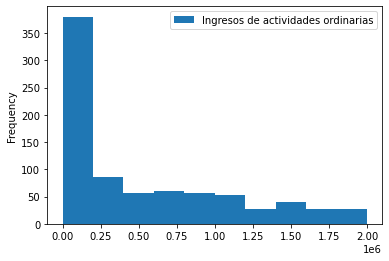

In [170]:
pd.set_option('display.float_format', lambda x: '%.0f' % x)
ERI['Ingresos de actividades ordinarias'][(ERI['Ingresos de actividades ordinarias']<=2000000) & (ERI['Periodo']=='Periodo Actual')].plot.hist(bins=10,legend = True)

ERI[['Ingresos de actividades ordinarias','Ganancia (pérdida), antes de impuestos','Ganancia (pérdida)']][(ERI['Ingresos de actividades ordinarias']<=2000000) & (ERI['Periodo']=='Periodo Actual')].describe()


,Ingresos de actividades ordinarias,"Ganancia (pérdida), antes de impuestos",Ganancia (pérdida)
count,803,803,803
mean,522713,1303469,1150567
std,575389,19394096,17694026
min,0,-204134784,-202829366
25%,0,-46579,-98539
50%,296390,100180,64280
75%,938745,654790,602113
max,1994054,480288696,426403506


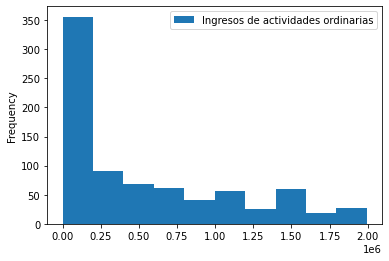

In [171]:
ERI['Ingresos de actividades ordinarias'][(ERI['Ingresos de actividades ordinarias']<=2000000) & (ERI['Periodo']=='Periodo Anterior')].plot.hist(bins=10, legend = True)
ERI[['Ingresos de actividades ordinarias','Ganancia (pérdida), antes de impuestos','Ganancia (pérdida)']][(ERI['Ingresos de actividades ordinarias']<=2000000) & (ERI['Periodo']=='Periodo Anterior')].describe()

In [162]:
empresas = ERI[(ERI['Ingresos de actividades ordinarias']<=2000000) & (ERI['Periodo']=='Periodo Actual')]['Nit']
ESF[['Total de activos','Total pasivos','Patrimonio total']][ESF['Nit'].isin(empresas)].describe()

,Total de activos,Total pasivos,Patrimonio total
count,1634,1633,1634
mean,30489021,8550903,21943351
std,60537139,24496492,59601244
min,0,0,-482864075
25%,7655328,848948,3173380
50%,14227448,2809894,9067891
75%,31347755,7539585,21004580
max,1033557589,497452811,1010384232


<AxesSubplot:title={'center':'Distribucion de Sectores'}, xlabel='Clasificación Industrial Internacional Uniforme Versión 4 A.C'>

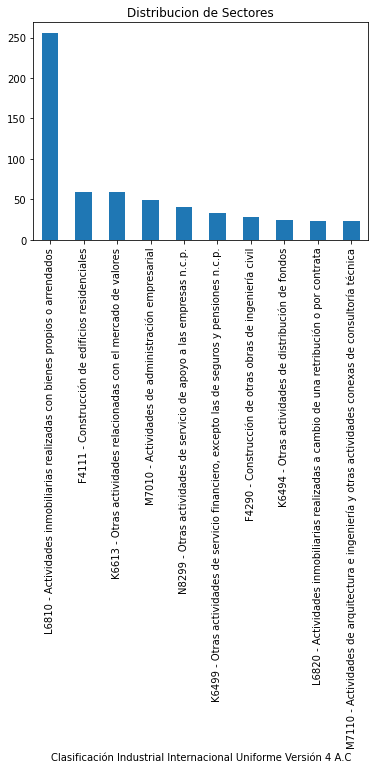

In [165]:
import matplotlib.pyplot as plt

sectores = pd.DataFrame(Caratula[Caratula['Nit'].isin(empresas)])
sectores = sectores[['Clasificación Industrial Internacional Uniforme Versión 4 A.C']].groupby('Clasificación Industrial Internacional Uniforme Versión 4 A.C').size().to_frame('count').sort_values(by = 'count', ascending = False).head(10)
sectores.plot.bar(legend = False, title= 'Distribucion de Sectores')

## Interpretación de Resultados:

De las anteriores descriptivas puede concluirse lo siguiente:

**Esta de Resultado Integral:** No ha habido un cambio significativo entre la distribución de ingresos del último año fiscal (2019) y el año anterior (2018). La media de ingresos está concentrada en los 504 MM mientras que la mediana está en 296 MM, por lo que la distribución de ingresos puede se asimétrica concentrada a la derecha.

**Estado de Situacion Financiera:**:

- En lo que respecta a la cuenta de Activos, la media se encuentra en los 3.489 MM, mostrando también sesgo a la derecha respecto a la mediana. Los valores mínimo y máximo se encuentran dentro de valores razonables.

- En cuando a Pasivos y Patrimonio, estos también se encuentran dentro de valores razonables. Es normal que ciertas empresas tengan un patrimonio negativo por lo que pueden estar en causal de disolución, sin embargo la descriptiva muestra que es menos del 25% de la muestra. En cuanto a los pasivos, no puede concluirse nada ya que estos deben compararse mediante una medida relativa.



**Distribución Sectorial:** En cuanto a sectores, la mayoría de empresas ejercen actividadesinmobiliarias. En general las principales actividades están recargadas hacia servicios y construcción.

## Ideas para el análisis estadístico:

En general las cifras paracen ser consistentes con lo que se espera, esto puede deberse a que este tipo de cifras son reportes oficiales obligatorios que exigen consistencia y auditados. 
